In [2]:
import numpy as np
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization as B_nor
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [3]:
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros

training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)


In [4]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [5]:
out_file_name=sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Salida_modelo"

In [6]:
input_img = keras.Input(shape=(100, 100, 1))

In [7]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

2025-03-11 13:24:55.161035: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [9]:
# Autoencoder
autoencoder = keras.Model(input_img, decoded)

In [10]:
# Clasificador (encima del encoder)
flat = layers.Flatten()(encoded)
dense = layers.Dense(500, activation='relu')(flat)
dense = layers.Dense(128, activation='relu')(dense)
output = layers.Dense(12, activation='softmax')(dense)  # 12 salidas para clasificación


In [11]:
classifier = keras.Model(input_img, output)

In [12]:
# Compilar el autoencoder (opcional, para pre-entrenamiento)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Compilar el clasificador
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el autoencoder (opcional)
#autoencoder.fit(x_sample, x_sample, epochs=50, batch_size=32, shuffle=True, validation_split= 0.25)

# Entrenar el clasificador
train_history=classifier.fit(x_train, y_train, epochs=50, batch_size=24, verbose=1 , validation_split= 0.25)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.2121 - loss: 5.2527 - val_accuracy: 0.2117 - val_loss: 2.1388
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.3705 - loss: 1.7606 - val_accuracy: 0.6645 - val_loss: 0.9509
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.8128 - loss: 0.5687 - val_accuracy: 0.8534 - val_loss: 0.4384
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.9076 - loss: 0.3140 - val_accuracy: 0.8143 - val_loss: 0.5323
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.9063 - loss: 0.2970 - val_accuracy: 0.8795 - val_loss: 0.3582
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - accuracy: 0.9405 - loss: 0.2044 - val_accuracy: 0.9186 - val_loss: 0.2738
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.9601 - loss: 0.1261 - val_accuracy: 0.9251 - val_loss: 0.2504
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.9677 - loss: 0.1267 - val_accuracy: 0

In [13]:
classifier.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    20,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,254,978 (229.85 MB)

 Trainable params: 20,084,992 (76.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,169,986 (153.24 MB)

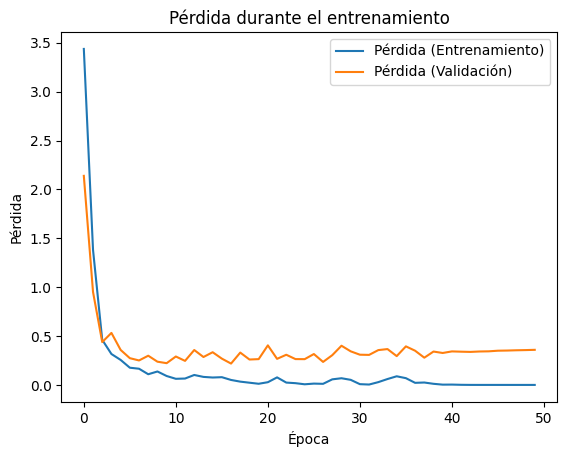

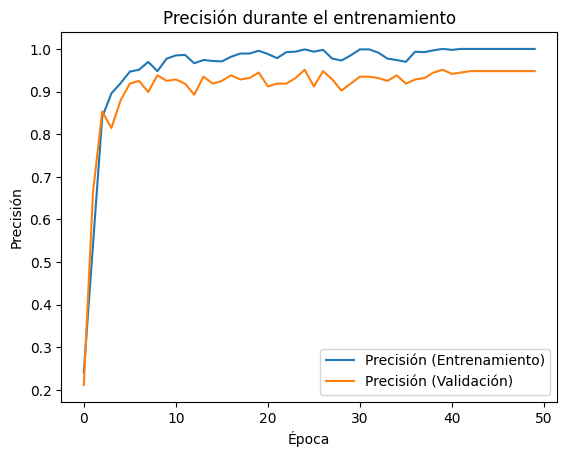

In [14]:
# Gráfico de la pérdida
plt.plot(train_history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(train_history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()
# Gráfico de la precisión

plt.plot(train_history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(train_history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.show()

In [16]:
loss, accuracy = classifier.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)


#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = classifier.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9300 - loss: 0.3803
Loss: 0.3488962650299072
Accuracy: 0.9376528263092041
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
MCC: 0.9268841913562563
Precisión micro (Prueba): 0.9376528117359413
Precisión macro (Prueba): 0.9318492840540776
Precisión ponderada (Prueba): 0.94008390870827
Precisión por clase (Prueba): [0.79564033 0.9826087  0.95098039 0.91549296 1.         0.98798077
 0.85287356 0.97952218 0.92790698 0.9173913  0.96501458 0.90677966]


In [17]:
# Obtener las predicciones
y_pred_probs = classifier.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


In [18]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

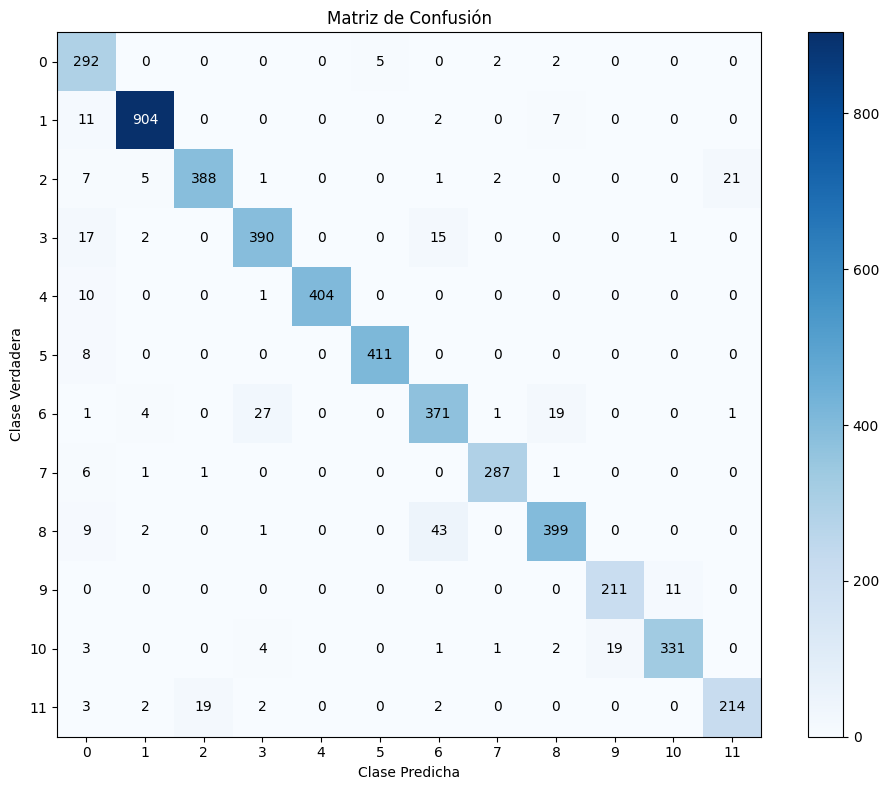

In [19]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()